In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cps_85_wages.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          534 non-null    int64  
 1   EDUCATION   534 non-null    int64  
 2   SOUTH       534 non-null    object 
 3   SEX         534 non-null    object 
 4   EXPERIENCE  534 non-null    int64  
 5   UNION       534 non-null    object 
 6   WAGE        534 non-null    float64
 7   AGE         534 non-null    int64  
 8   RACE        534 non-null    object 
 9   OCCUPATION  534 non-null    object 
 10  SECTOR      534 non-null    object 
 11  MARR        534 non-null    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 50.2+ KB


In [4]:
df.describe()

,id,EDUCATION,EXPERIENCE,WAGE,AGE
count,534.000000,534.000000,534.000000,534.000000,534.000000
mean,267.500000,13.018727,17.822097,9.024064,36.833333
std,154.296792,2.615373,12.379710,5.139097,11.726573
min,1.000000,2.000000,0.000000,1.000000,18.000000
25%,134.250000,12.000000,8.000000,5.250000,28.000000
50%,267.500000,12.000000,15.000000,7.780000,35.000000
75%,400.750000,15.000000,26.000000,11.250000,44.000000
max,534.000000,18.000000,55.000000,44.500000,64.000000


In [5]:
df.head()

,id,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,WAGE,AGE,RACE,OCCUPATION,SECTOR,MARR
0,1,8,no,female,21,not_member,5.10,35,Hispanic,Other,Manufacturing,Married
1,2,9,no,female,42,not_member,4.95,57,White,Other,Manufacturing,Married
2,3,12,no,male,1,not_member,6.67,19,White,Other,Manufacturing,Unmarried
3,4,12,no,male,4,not_member,4.00,22,White,Other,Other,Unmarried
4,5,12,no,male,17,not_member,7.50,35,White,Other,Other,Married


In [6]:
df.columns

Index(['id', 'EDUCATION', 'SOUTH', 'SEX', 'EXPERIENCE', 'UNION', 'WAGE', 'AGE',
       'RACE', 'OCCUPATION', 'SECTOR', 'MARR'],
      dtype='object')

<AxesSubplot: xlabel='AGE', ylabel='EXPERIENCE'>

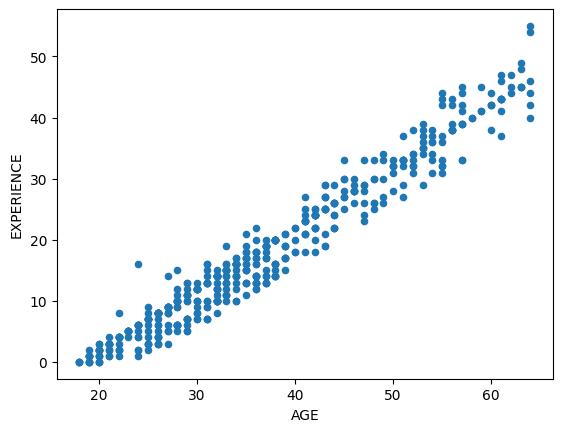

In [7]:
df.plot(kind='scatter', x='AGE', y='EXPERIENCE')

<AxesSubplot: xlabel='AGE', ylabel='EXPERIENCE'>

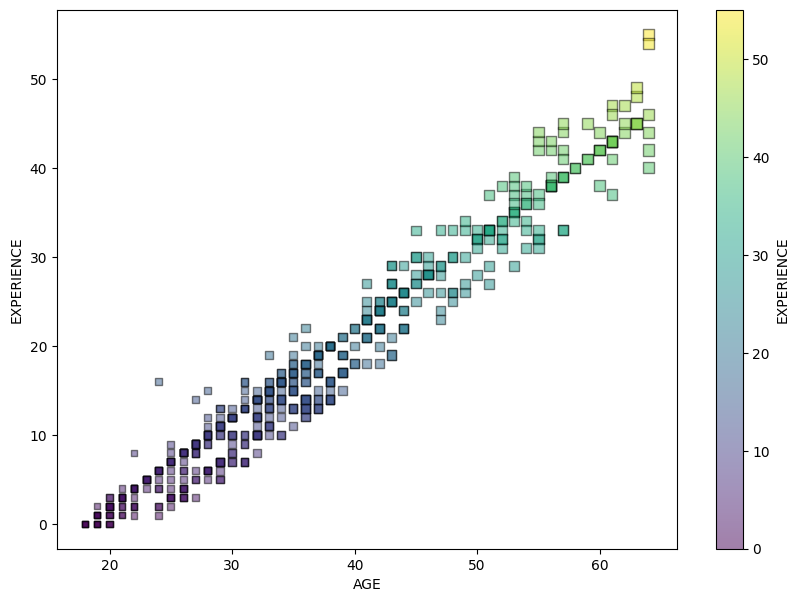

In [9]:
df.plot(kind='scatter', x='AGE', y='EXPERIENCE', alpha=0.5, 
    c='EXPERIENCE', cmap='viridis', figsize=(10,7), marker='s', s='AGE',
    edgecolor='black')

<AxesSubplot: xlabel='AGE', ylabel='WAGE'>

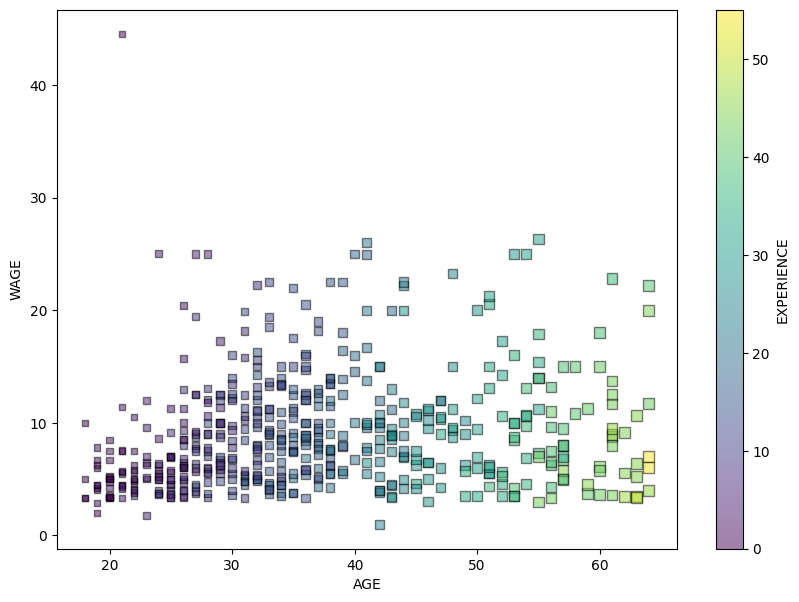

In [10]:
df.plot(kind='scatter', x='AGE', y='WAGE', alpha=0.5, 
    c='EXPERIENCE', cmap='viridis', figsize=(10,7), marker='s', s='AGE',
    edgecolor='black')

In [11]:
df[['EDUCATION','SOUTH', 'AGE']] # subset

,EDUCATION,SOUTH,AGE
0,8,no,35
1,9,no,57
2,12,no,19
3,12,no,22
4,12,no,35
...,...,...,...
529,18,no,29
530,12,no,51
531,17,no,48
532,12,yes,31


In [12]:
df.pivot_table(values='AGE', index='SECTOR',aggfunc=['mean','max','min','median'])

,mean,max,min,median
,AGE,AGE,AGE,AGE
SECTOR,,,,
Construction,40.083333,61,20,42.5
Manufacturing,37.838384,64,19,35.0
Other,36.401460,64,18,35.0


In [13]:
df.pivot_table(values='AGE',index='SECTOR',columns='SEX')

SEX,female,male
SECTOR,,
Construction,57.500000,38.500000
Manufacturing,38.666667,37.300000
Other,37.490196,35.328502


<AxesSubplot: xlabel='SECTOR'>

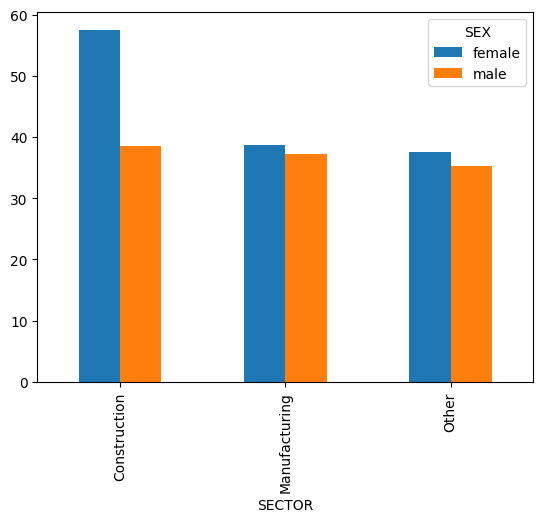

In [14]:
df.pivot_table(values='AGE',index='SECTOR',columns='SEX').plot(kind='bar')

In [15]:
df

,id,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,WAGE,AGE,RACE,OCCUPATION,SECTOR,MARR
0,1,8,no,female,21,not_member,5.10,35,Hispanic,Other,Manufacturing,Married
1,2,9,no,female,42,not_member,4.95,57,White,Other,Manufacturing,Married
2,3,12,no,male,1,not_member,6.67,19,White,Other,Manufacturing,Unmarried
3,4,12,no,male,4,not_member,4.00,22,White,Other,Other,Unmarried
4,5,12,no,male,17,not_member,7.50,35,White,Other,Other,Married
...,...,...,...,...,...,...,...,...,...,...,...,...
529,530,18,no,male,5,not_member,11.36,29,White,Professional,Other,Unmarried
530,531,12,no,female,33,not_member,6.10,51,Other,Professional,Other,Married
531,532,17,no,female,25,member,23.25,48,Other,Professional,Other,Married
532,533,12,yes,male,13,member,19.88,31,White,Professional,Other,Married


# filtering data using boolean filtering

In [16]:
df['SECTOR'] == 'Manufacturing' # this is boolean filter

0       True
1       True
2       True
3      False
4      False
       ...  
529    False
530    False
531    False
532    False
533     True
Name: SECTOR, Length: 534, dtype: bool

In [17]:
df[df['SECTOR'] == 'Manufacturing'] # boolean filtering

,id,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,WAGE,AGE,RACE,OCCUPATION,SECTOR,MARR
0,1,8,no,female,21,not_member,5.10,35,Hispanic,Other,Manufacturing,Married
1,2,9,no,female,42,not_member,4.95,57,White,Other,Manufacturing,Married
2,3,12,no,male,1,not_member,6.67,19,White,Other,Manufacturing,Unmarried
8,9,16,no,male,11,not_member,13.28,33,White,Other,Manufacturing,Married
11,12,12,no,male,19,member,11.50,37,White,Other,Manufacturing,Unmarried
...,...,...,...,...,...,...,...,...,...,...,...,...
484,485,17,no,male,3,not_member,20.40,26,White,Professional,Manufacturing,Unmarried
486,487,14,no,male,19,not_member,16.42,39,White,Professional,Manufacturing,Unmarried
496,497,18,no,female,37,not_member,22.83,61,White,Professional,Manufacturing,Unmarried
521,522,16,no,male,17,not_member,22.50,39,White,Professional,Manufacturing,Married


In [18]:
df[~(df['SECTOR'] == 'Manufacturing')] # inverted boolean filtering

,id,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,WAGE,AGE,RACE,OCCUPATION,SECTOR,MARR
3,4,12,no,male,4,not_member,4.00,22,White,Other,Other,Unmarried
4,5,12,no,male,17,not_member,7.50,35,White,Other,Other,Married
5,6,13,no,male,9,member,13.07,28,White,Other,Other,Unmarried
6,7,10,yes,male,27,not_member,4.45,43,White,Other,Other,Unmarried
7,8,12,no,male,9,not_member,19.47,27,White,Other,Other,Unmarried
...,...,...,...,...,...,...,...,...,...,...,...,...
528,529,16,no,female,6,member,11.79,28,White,Professional,Other,Unmarried
529,530,18,no,male,5,not_member,11.36,29,White,Professional,Other,Unmarried
530,531,12,no,female,33,not_member,6.10,51,Other,Professional,Other,Married
531,532,17,no,female,25,member,23.25,48,Other,Professional,Other,Married


In [19]:
explt10 = df['EXPERIENCE'] <= 10 # boolean filter
df[explt10]

,id,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,WAGE,AGE,RACE,OCCUPATION,SECTOR,MARR
2,3,12,no,male,1,not_member,6.67,19,White,Other,Manufacturing,Unmarried
3,4,12,no,male,4,not_member,4.00,22,White,Other,Other,Unmarried
5,6,13,no,male,9,member,13.07,28,White,Other,Other,Unmarried
7,8,12,no,male,9,not_member,19.47,27,White,Other,Other,Unmarried
9,10,12,no,male,9,not_member,8.75,27,White,Other,Other,Unmarried
...,...,...,...,...,...,...,...,...,...,...,...,...
522,523,16,no,male,10,member,7.50,32,White,Professional,Other,Married
523,524,17,yes,male,2,not_member,7.00,25,White,Professional,Other,Married
526,527,15,no,male,10,not_member,12.50,31,White,Professional,Other,Unmarried
528,529,16,no,female,6,member,11.79,28,White,Professional,Other,Unmarried


<AxesSubplot: >

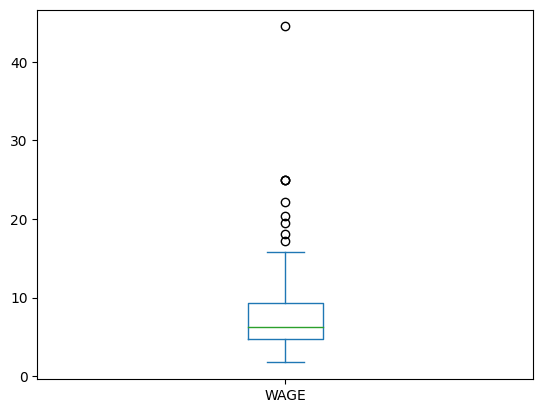

In [20]:
df[explt10].plot(kind='box', x='EXPERIENCE', y='WAGE')

# sorting

df.sort_values(by='AGE', inplace=True)

In [21]:
df.sort_values(by='AGE', inplace=True)

In [22]:
df.sort_values(by=['RACE','WAGE'], ascending=[False,True], inplace=True)

# group by

In [23]:
df.groupby('OCCUPATION')['EXPERIENCE'].mean()

OCCUPATION
Clerical        17.577320
Management      18.072727
Other           18.064103
Professional    15.457143
Sales           18.447368
Service         20.192771
Name: EXPERIENCE, dtype: float64

In [24]:
df.groupby('OCCUPATION')['EXPERIENCE','WAGE'].mean()

C:\Users\thesa\AppData\Local\Temp\ipykernel_5392\3989577191.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('OCCUPATION')['EXPERIENCE','WAGE'].mean()


,EXPERIENCE,WAGE
OCCUPATION,,
Clerical,17.577320,7.422577
Management,18.072727,12.704000
Other,18.064103,8.426474
Professional,15.457143,11.947429
Sales,18.447368,7.592632
Service,20.192771,6.537470


In [25]:
df.groupby(['OCCUPATION'])['EXPERIENCE','WAGE'].mean()

C:\Users\thesa\AppData\Local\Temp\ipykernel_5392\4067934662.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['OCCUPATION'])['EXPERIENCE','WAGE'].mean()


,EXPERIENCE,WAGE
OCCUPATION,,
Clerical,17.577320,7.422577
Management,18.072727,12.704000
Other,18.064103,8.426474
Professional,15.457143,11.947429
Sales,18.447368,7.592632
Service,20.192771,6.537470
